## **Google Play Store & Data preprocessing** 

##  **Table of content** :
- Business Understanding
- Data UnderStanding
- Preparing the environment
- EDA
- Data Cleaning
- Visualization
    

## **Business Understanding** 
-  okay listen I redueced the nan values in the Rating column fromn 1400 to 600 by seenign the very minmum values
 on the other coulmn like reviews and convert it to  0 not what should  I do With the rest of the data



## Data Understading 
- `Dataset`: Google Play Store data (“googleplaystore.csv”)
- `Fields in the data`:
- `App`: Application name
- `Category`: Category to which the app belongs
- `Rating`: Overall user rating of the app
- `Reviews`: Number of user reviews for the app
- `Size`: Size of the app
- `Installs`: Number of user downloads/installs for the app
- `Type`: Paid or Free
- `Price`: Price of the app
- `Content` Rating: Age group the app is targeted at - Children / Mature 21+ / Adult*
- `Genres`: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, * Family genres.
- `Last Updated`: Date when the app was last updated on Play Store
- `Current Ver`: Current version of the app available on Play Store
- `Android Ver`: Minimum required Android version

## **Preparing the environment** 

In [40]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import missingno as msno
import datetime as dt


In [2]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# EDA >>>> Detecting problems

In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

# The problems
- problem 1 rewies, data type
- problem 2 size, data type
- problem 3 installs, data type
- problem 4 price, data type 
- problem 5 Last Updated data type
- problem 6 Fixing Anderoid Ver 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- ### problem 7 we have null values in column :
- "rating"
- "current ver"
- "Android ver"
- "type"
- "content Rating"

In [7]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## problem 8 ' 1.9' Outlier

In [8]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

### problem 9  '0' instead of free oulier

In [9]:
df.Genres.unique() # no issues Alhmed Allah

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [10]:
df.duplicated().sum()

483

- ### problem 10 duplicated rows

In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- ### problem 12: The max value excess 5 *Outlier*

# **Our to do list**:

### Task 1 'Data type':
 -  problem 1 rewies, data type
 - problem 2 size, data type
 - problem 3 installs, data type
 - problem 4 price, data type 
 - problem 5 Last Updated data type
 - Problem 6 Anderoid Fixing
### Task 2 'NUll Values':
- problem 7 we have null values in column :
 "rating"
 "current ver"
 "Android ver"
 "type"
 "content Rating"
### Task 3 'duplicated values' 
### Task 4 'Outliers' 
- Catogrey column
- Type column 
- Rating column
  

## **DATA CLEANING**
- Data type >>> Task 1

In [12]:
df['Reviews']=df['Reviews'].astype(int)
df.dtypes

ValueError: invalid literal for int() with base 10: '3.0M'

In [13]:
df['Reviews']=df['Reviews'].str.strip('M')


In [14]:
df['Reviews']=df['Reviews'].astype(float)
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### problem 1 checked, now fixing ('Size column')

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
df['Size']=df['Size'].str.replace('M','000000')
df['Size']=df['Size'].str.replace('k','000')
df['Size']=df['Size'].str.replace('Varies with device','0')
df['Size']=df['Size'].str.strip('+')
df['Size']=df['Size'].str.replace('1,000','1000')
df['Size']=df['Size'].astype(float)
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### problem 2 solved , now fixing ('Install column') 

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [19]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.strip('+')
df['Installs']=df['Installs'].str.replace('Free','0')
df['Installs']=df['Installs'].astype(int)

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### problem 3 solved, Now fixing ('Price column')

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price']=df['Price'].str.strip('$')
df['Price']=df['Price'].str.replace('Everyone','0')
df['Price']=df['Price'].astype(float)
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### problem 4 solved, Now Fixing 'Last Updated column'

In [23]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [24]:
df['Last Updated']=pd.to_datetime(df['Last Updated'], format="%B %d, %Y",errors='coerce')
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

- ### Problem 5 Solved Now Fixing Anderoid ver

In [25]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [26]:
df['Android Ver']=df['Android Ver'].str.strip('and up')
df['Android Ver']=df['Android Ver'].str.strip('W')
df['Android Ver'] = df['Android Ver'].replace("Varies with device", pd.NA) 
df['Android Ver'].value_counts()

Android Ver
4.1              2451
4.0.3            1501
4.0              1375
4.4               992
2.3               652
5.0               601
4.2               394
2.3.3             281
2.2               244
4.3               243
3.0               241
2.1               134
1.6               116
6.0                60
7.0                42
3.2                36
2.0                32
5.1                24
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
4.0.3 - 7.1.1       2
5.0 - 8.0           2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

### `Task 1` Solved Now `Task 2`
Null value

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     9476 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.0+ MB


AttributeError: module 'matplotlib' has no attribute 'show'

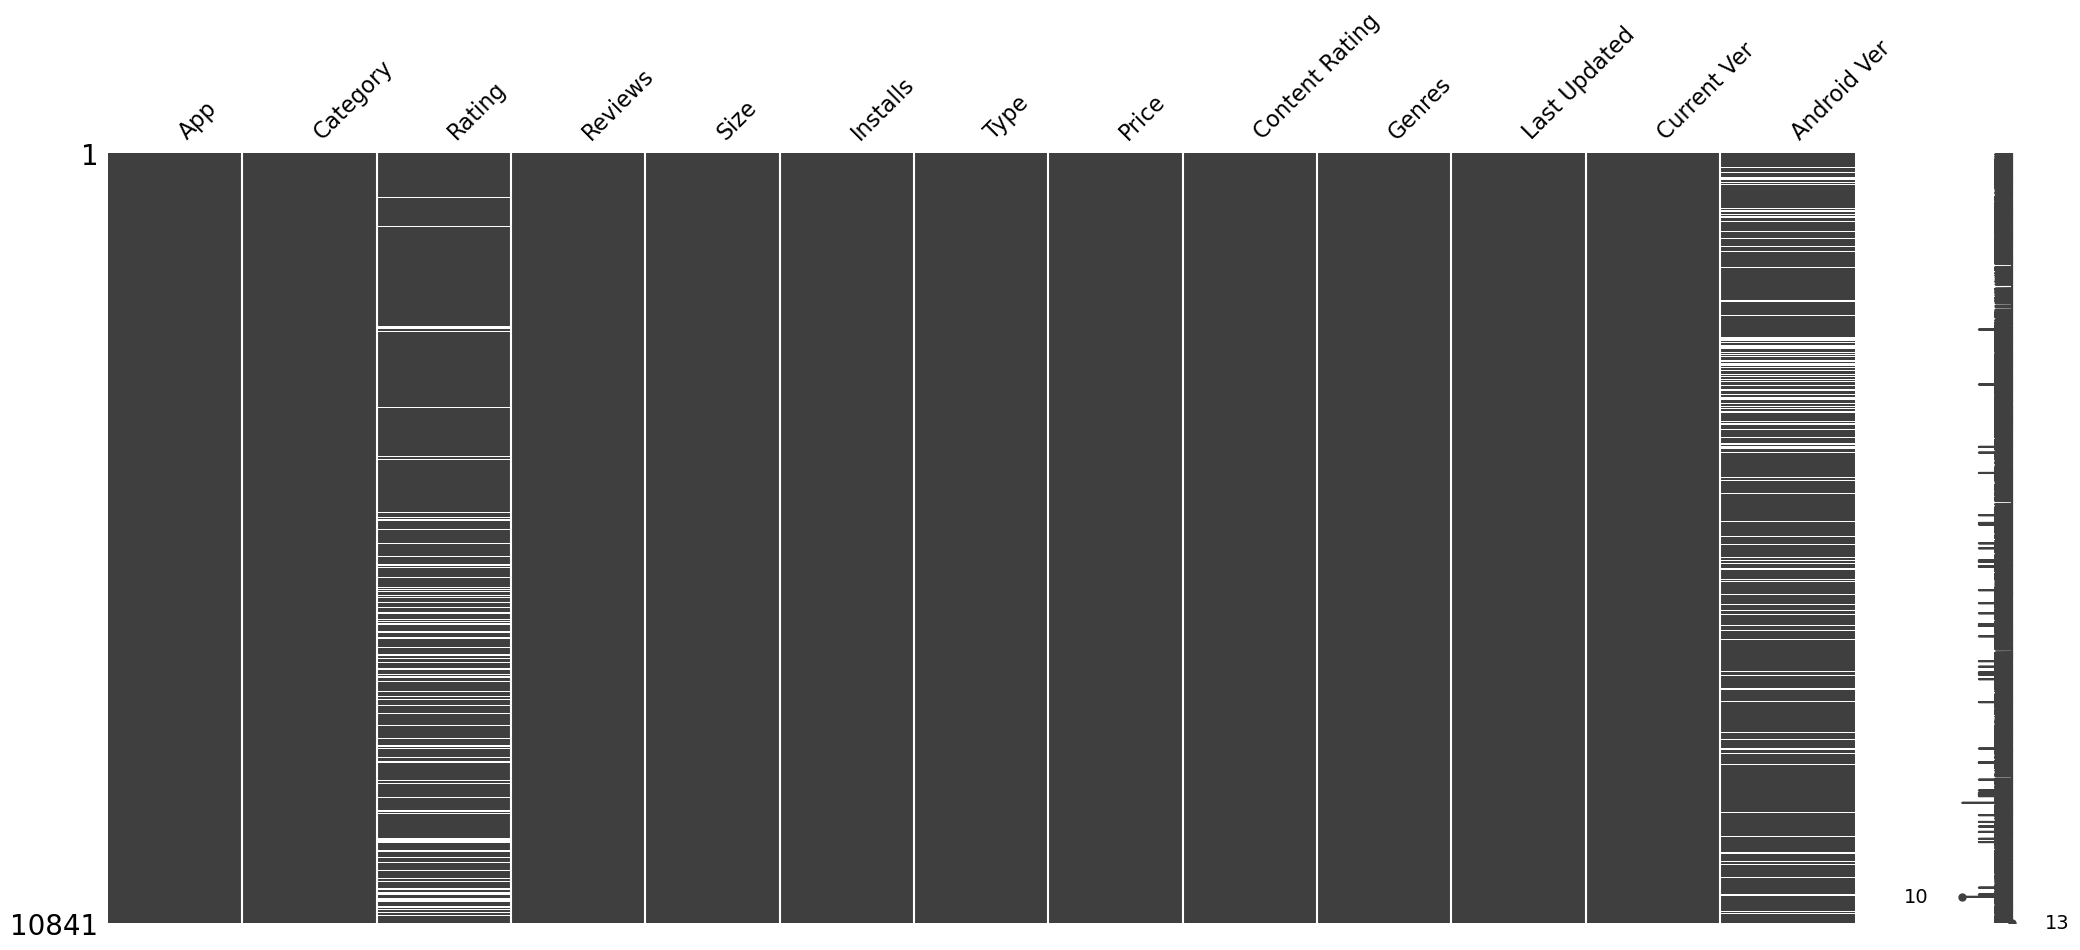

In [28]:
msno.matrix(df)
plt.show()

<Axes: >

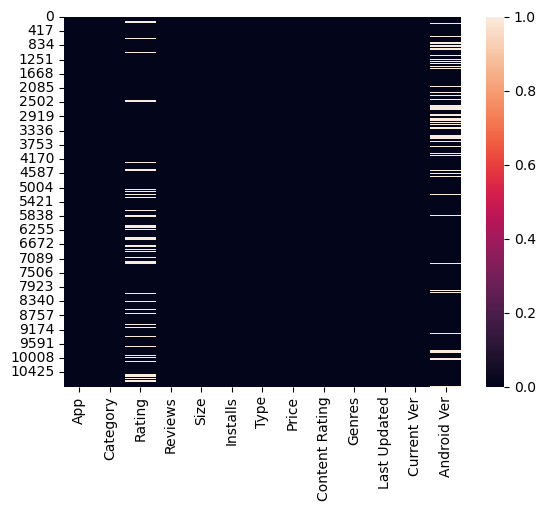

In [29]:
sns.heatmap(df.isnull())

<Axes: >

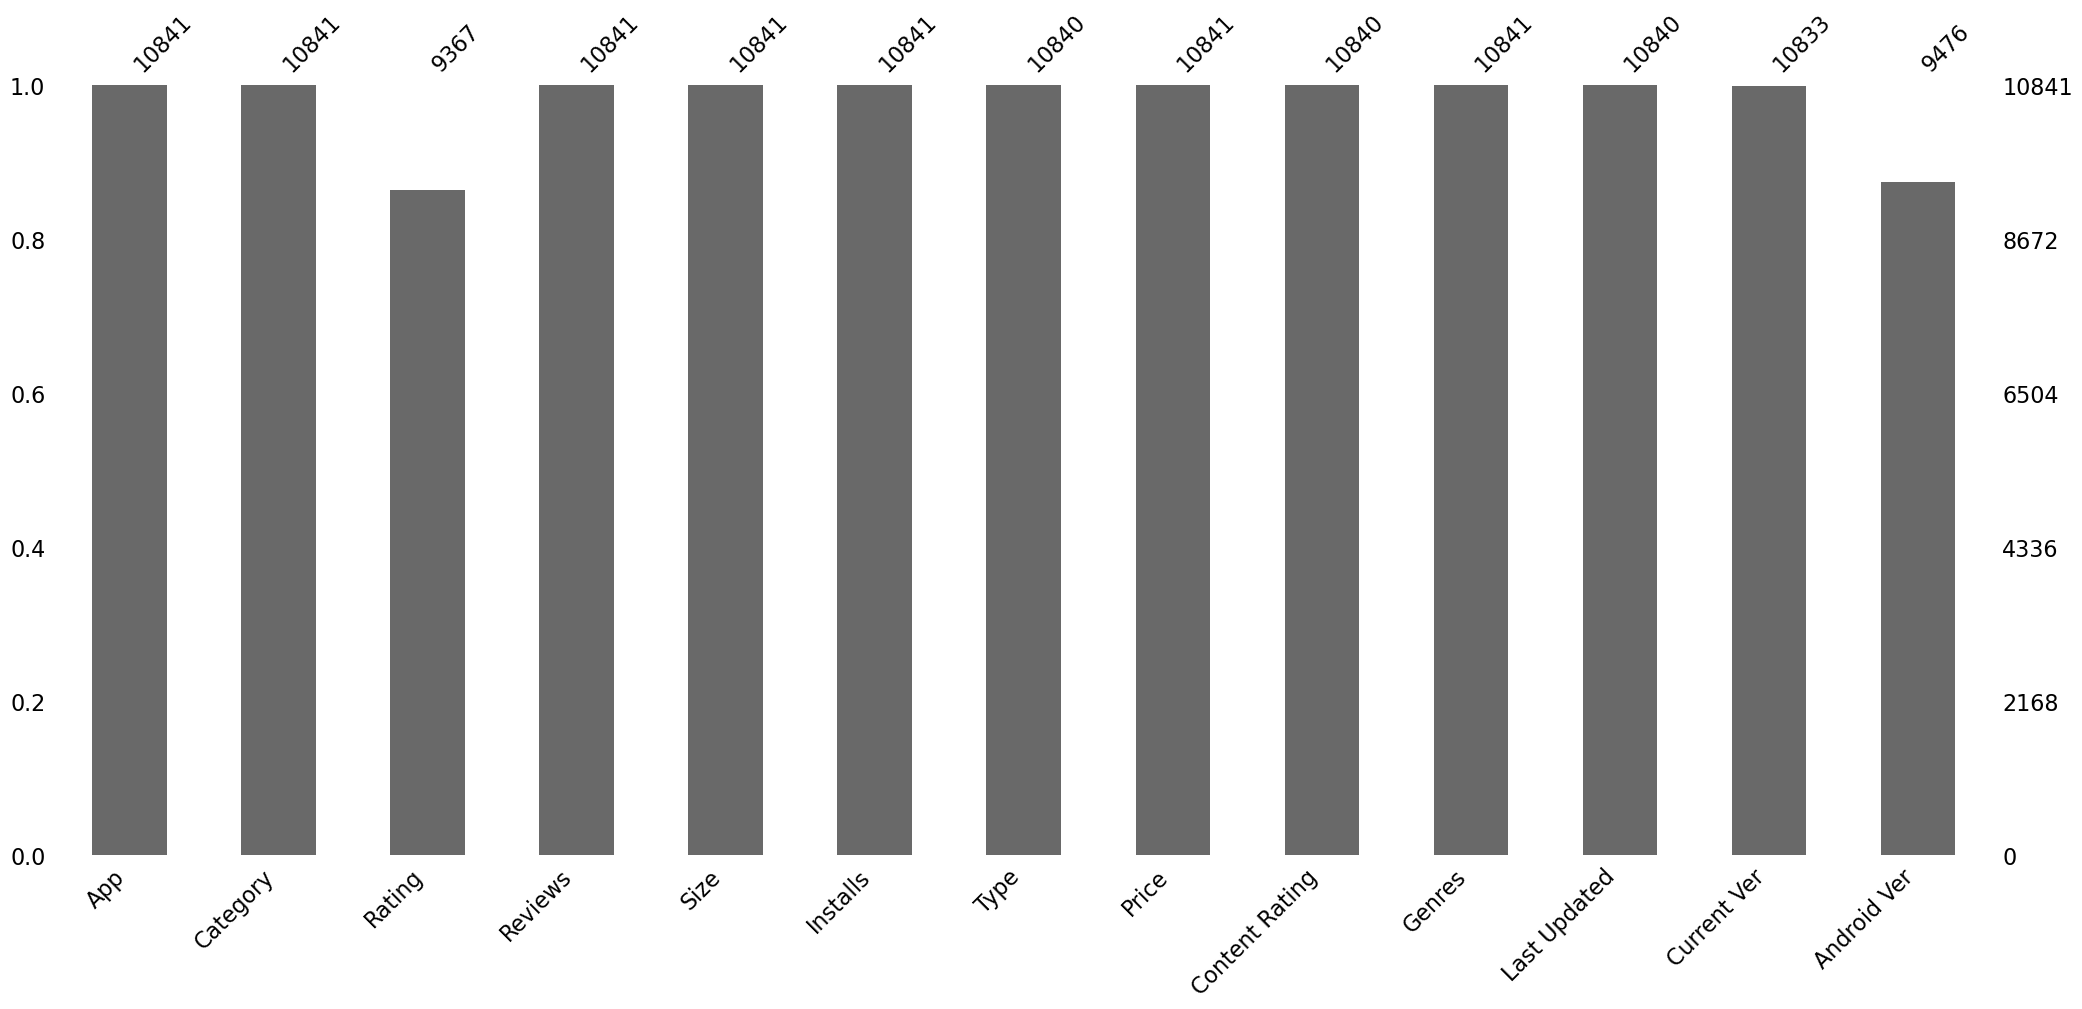

In [30]:
msno.bar(df)

In [31]:
df[df['Rating'].isna()].describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,0.0,1474.000000,1.474000e+03,1474.000000,1474.000000,1474
mean,NaN,18.062415,1.087939e+07,4053.968114,1.449539,2017-09-30 15:30:02.442333952
min,NaN,0.000000,0.000000e+00,0.000000,0.000000,2012-01-12 00:00:00
25%,NaN,0.000000,3.700000e+00,10.000000,0.000000,2017-06-07 06:00:00
50%,NaN,1.000000,9.300000e+00,100.000000,0.000000,2018-02-19 00:00:00
75%,NaN,5.000000,1.800000e+07,500.000000,0.000000,2018-06-21 00:00:00
max,NaN,3248.000000,9.900000e+07,1000000.000000,399.990000,2018-08-07 00:00:00
std,NaN,139.912271,1.614832e+07,40795.975992,16.770343,NaN


In [32]:
df.loc[(df['Reviews'] == 0) & (df['Rating'].isna()), 'Rating'] = 0
df['Rating'].isnull().sum()

878

In [33]:
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7,50000,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4,100000,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9,10000,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,List iptv FR,VIDEO_PLAYERS,NaN,1.0,2.9,100,Free,0.0,Everyone,Video Players & Editors,2018-04-22,1.0,4.0.3
10824,Cardio-FR,MEDICAL,NaN,67.0,82000000.0,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4
10825,Naruto & Boruto FR,SOCIAL,NaN,7.0,7.7,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9.8,5000,Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0


In [34]:
df.loc[(df['Reviews']<2)&(df['Reviews']!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
620,Ost. Zombies Cast - New Music and Lyrics,DATING,NaN,1.0,4.6,100,Free,0.0,Teen,Dating,2018-07-20,1.0,4.0.3
624,Live chat - free video chat,DATING,NaN,1.0,8.7,500,Free,0.0,Mature 17+,Dating,2018-07-23,3.52,4.0.3
625,House party - live chat,DATING,1.0,1.0,9.2,10,Free,0.0,Mature 17+,Dating,2018-07-31,3.52,4.0.3
637,Soy Luna - Top Music And Lyrics,DATING,NaN,1.0,5.0,100,Free,0.0,Teen,Dating,2018-07-24,1.0,4.0.3
645,UK Girls Mobile Numbers,DATING,3.0,1.0,5.5,500,Free,0.0,Mature 17+,Dating,2018-07-19,1.0,4.0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10775,FQ - Football Quiz,SPORTS,NaN,1.0,9.0,1,Free,0.0,Everyone,Sports,2018-05-29,1.0,5.0
10776,Monster Ride Pro,GAME,5.0,1.0,24000000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3
10788,Fountain Live Wallpaper HD – Dubai Wallpaper 3D,PERSONALIZATION,NaN,1.0,20000000.0,500,Free,0.0,Everyone,Personalization,2018-04-13,1.0,4.1
10806,SnakeBite911 FR,MEDICAL,NaN,1.0,42000000.0,500,Free,0.0,Everyone,Medical,2017-10-09,1.2,4.1


In [35]:
mean_rating = df[(df['Reviews'] < 2) & (df['Reviews'] != 0)]['Rating'].mean()
df.loc[(df['Reviews'] < 2) & (df['Reviews'] != 0) & (df['Rating'].isna()), 'Rating'] = mean_rating


In [36]:
df['Rating'].isnull().sum()

673

In [37]:
from sklearn.impute import KNNImputer

knn_features = df[['Rating', 'Reviews', 'Installs']]

imputer = KNNImputer(n_neighbors=5)
df[['Rating']] = imputer.fit_transform(knn_features)[:, 0].reshape(-1, 1)


In [38]:
df['Rating'].isnull().sum()

0

In [39]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     9476 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.0+ MB


In [40]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0.0,0.0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,<NA>


In [41]:
df=df.drop(index=9148)

In [42]:
df['Type'].isnull().sum()

0

In [43]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2.7,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145.0,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010.0,8.7,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0
6803,BT Master,FAMILY,0.000000,0.0,222000.0,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6
7333,Dots puzzle,FAMILY,4.000000,179.0,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0
7407,Calculate My IQ,FAMILY,4.180000,44.0,7.2,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3
7730,UFO-CQ,TOOLS,4.179104,1.0,237000.0,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,3.320000,8.0,658000.0,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0


In [44]:
df['Current Ver'] = df.groupby('App')['Current Ver'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [45]:
df['Current Ver'].isnull().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  float64       
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10839 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     9476 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.1+ MB


In [47]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,0.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,<NA>
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,0.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,<NA>
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,0.0,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,<NA>
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,0.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,<NA>
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777.0,0.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-08-04,Varies with device,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471.0,0.0,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,<NA>
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,0.0,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,<NA>
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,0.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,<NA>
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,<NA>


In [48]:
df['Android Ver'] = df['Android Ver'].fillna(
    df.groupby('App')['Android Ver'].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
)


In [49]:
df['Android Ver'].isnull().sum()

0

## Task 3 :dublicated values

In [50]:
df.duplicated().sum()

483

In [51]:
df = df.drop_duplicates(keep='last')


In [52]:
df.duplicated().sum()

0

In [53]:
len(df)

10357

## Task 4 outliers 

In [54]:
df['Category'] .unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [55]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0,1000.0,0,0,0.0,NaN,"February 11, 2018",NaT,4.0 and up,Unknown


In [56]:
## it 's the same outlier of Rating column 

In [57]:
df=df.drop(index=10472)


In [58]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'show'

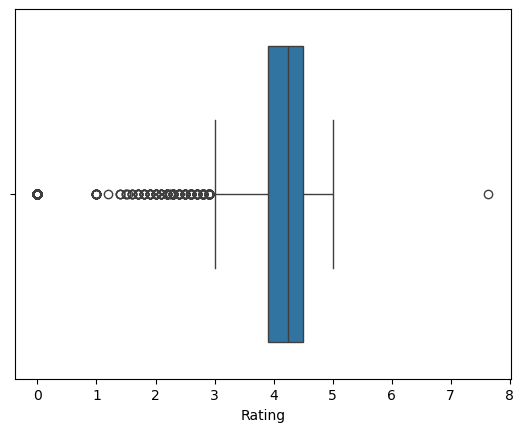

In [59]:
sns.boxplot(data=df,x='Rating',orient='h')
plt.show()

In [60]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,7.635821,4.0,64000000.0,1,Free,0.0,Everyone,Education,2018-07-17,1.0.1,4.4


In [61]:
df.loc[df['Rating'] > 5, 'Rating'] = df['Rating'].mean()

In [62]:
# I will keep the 0 Rating it would help

In [63]:
df[df['Rating']==0] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,0.0,0.0,20000000.0,50,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,0.0,0.0,18000.0,100,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0
621,Dating White Girls,DATING,0.0,0.0,3.6,50,Free,0.00,Mature 17+,Dating,2018-07-20,1.0,4.0
623,Geeks Dating,DATING,0.0,0.0,13000000.0,50,Free,0.00,Mature 17+,Dating,2018-07-10,1.0,4.1
627,CAM5678 Video Chat,DATING,0.0,0.0,39000000.0,500,Free,0.00,Mature 17+,Dating,2018-07-13,5.5.8,4.0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,0.0,0.0,8.9,10,Free,0.00,Everyone,Lifestyle,2018-07-31,7.2.2,4.1
10774,Miss FQ,NEWS_AND_MAGAZINES,0.0,0.0,36000000.0,10,Free,0.00,Everyone,News & Magazines,2018-04-05,3.8,4.4
10798,Word Search Tab 1 FR,FAMILY,0.0,0.0,1020000.0,50,Paid,1.04,Everyone,Puzzle,2012-02-06,1.1,3.0
10822,PLMGSS FR,PRODUCTIVITY,0.0,0.0,3.1,10,Free,0.00,Everyone,Productivity,2017-12-01,1,4.4


AttributeError: module 'matplotlib' has no attribute 'show'

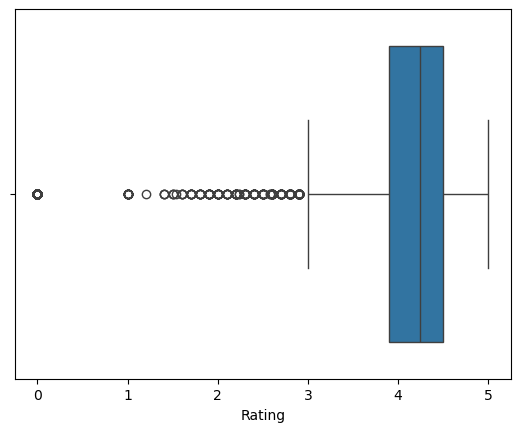

In [64]:
sns.boxplot(data=df,x='Rating',orient='h')
plt.show()

# Visulazation 

- ### What is the most expensive app on the Play Store?

In [65]:
most_expensive_apps = df[df['Price'] == df['Price'].max()]
print(most_expensive_apps[['App', 'Price']])


                           App  Price
4367  I'm Rich - Trump Edition  400.0


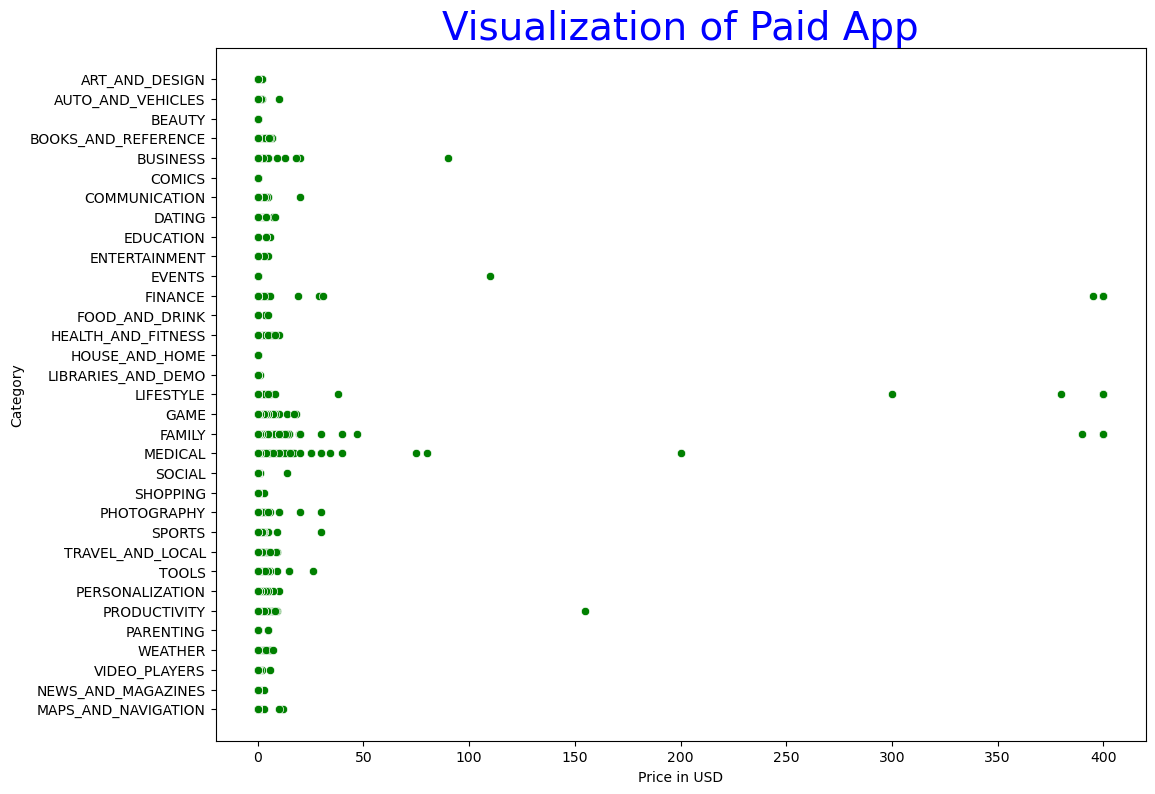

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, y="Category", x="Price", color="g")  
plt.xlabel("Price in USD")
plt.ylabel("Category")
plt.title("Visualization of Paid App", size=28, color="b")  # Fixed the color parameter
plt.show() 


- ### Which genre has the highest number of apps?

In [67]:
genre_counts = df['Category'].value_counts()
print(df['Category'].mode())
print (genre_counts.max())

0    FAMILY
Name: Category, dtype: object
1942


C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\1348639401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="rainbow")


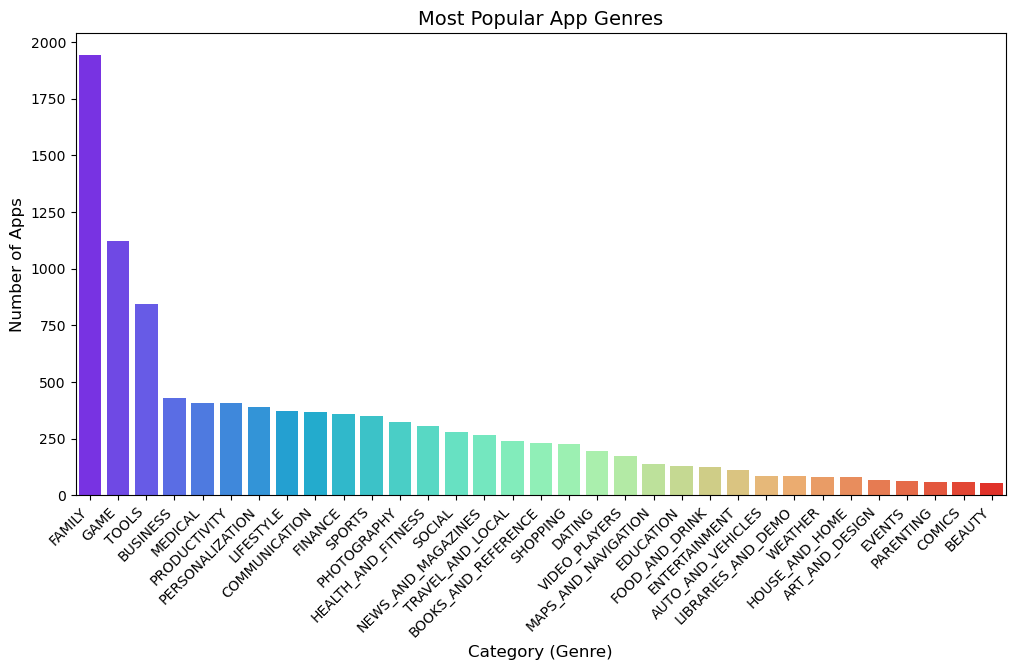

In [68]:

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="rainbow")

# Labels and title
plt.xlabel("Category (Genre)", fontsize=12)
plt.ylabel("Number of Apps", fontsize=12)
plt.title("Most Popular App Genres", fontsize=14)
plt.xticks(rotation=45, ha="right") 
plt.show()


- ### What is the average size of free vs. paid apps?

In [70]:
avg_size = df.groupby('Type')['Size'].mean() 
print(avg_size)


Type
Free    1.653920e+07
Paid    1.567177e+07
Name: Size, dtype: float64


C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\3416776376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette=["blue", "green"])


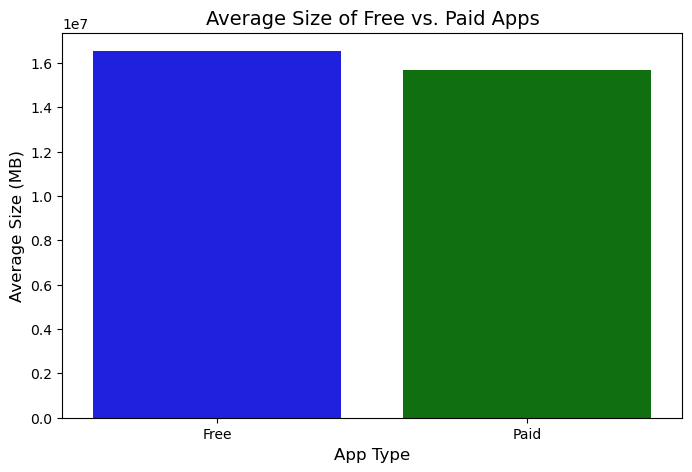

In [71]:

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_size.index, y=avg_size.values, palette=["blue", "green"])

# Labels and title
plt.xlabel("App Type",fontsize=12)
plt.ylabel("Average Size (MB)", fontsize=12)
plt.title("Average Size of Free vs. Paid Apps", fontsize=14)
plt.show()


- ### What are the top 5 most expensive apps with a perfect rating (5)?

In [72]:
top_5_apps=df.loc[(df['Rating'] == 5.0) & (df['Price'] > 0)].sort_values(by='Price', ascending=False).head(5)
top_5_apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,FAMILY,5.0,1.0,96000000.0,10,Paid,29.99,Mature 17+,Education,2016-01-19,3.30,4.0
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40000000.0,10,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2
5482,meStudying: AP English Lit,FAMILY,5.0,1.0,655000.0,10,Paid,4.99,Everyone,Education,2013-08-31,1.3,2.0.1
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1.0,27000000.0,100,Paid,4.99,Everyone,Education,2018-03-28,1.5.2,4.1
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1.0,63000000.0,10,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3


C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\3960309519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_apps, y='App', x='Price', palette='coolwarm')


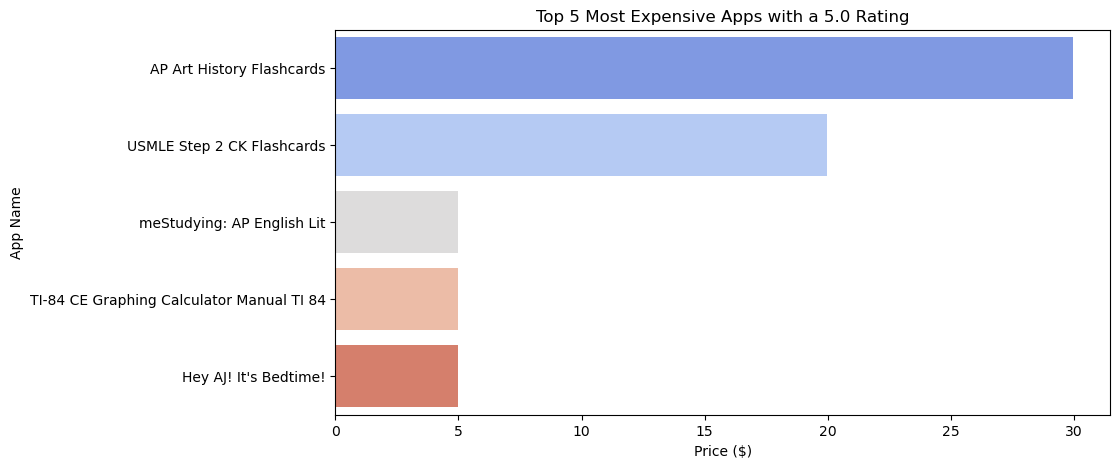

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_apps, y='App', x='Price', palette='coolwarm')

plt.xlabel("Price ($)")
plt.ylabel("App Name")
plt.title("Top 5 Most Expensive Apps with a 5.0 Rating")
plt.show()

- ### How many apps have received more than 50K reviews?

In [74]:
Hight_reviwes=df[df['Reviews']>50000].shape[0]
Hight_reviwes

2525

C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\3432571621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Reviews'] > 50000], y='Category', order=df[df['Reviews'] > 50000]['Category'].value_counts().index, palette="coolwarm")


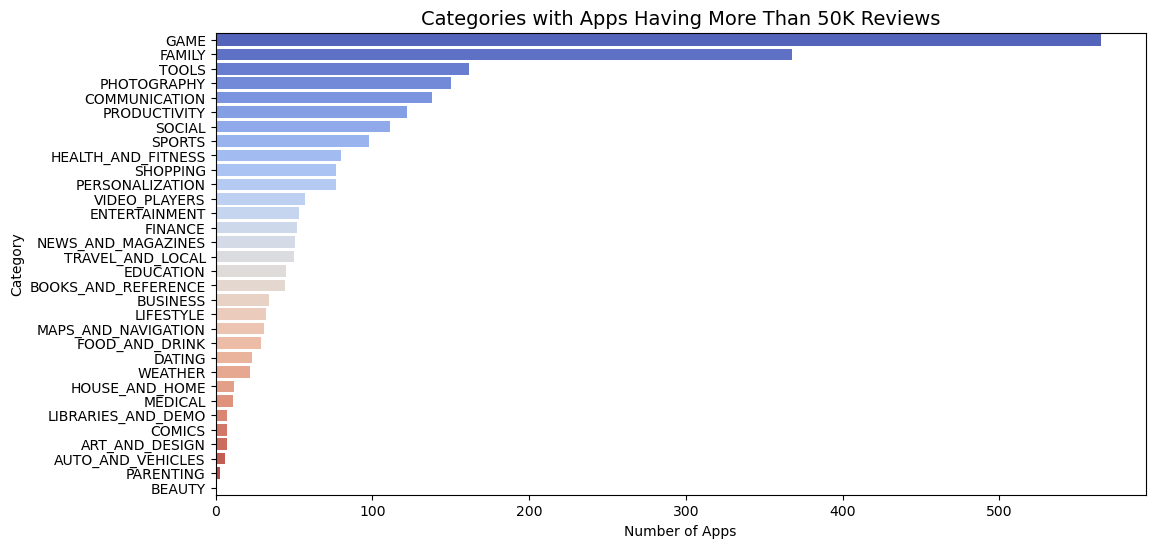

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Reviews'] > 50000], y='Category', order=df[df['Reviews'] > 50000]['Category'].value_counts().index, palette="coolwarm")

plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.title("Categories with Apps Having More Than 50K Reviews", fontsize=14)

plt.show()


- ### What is the average price of apps, grouped by genre and number of installs?

In [76]:
avg_price = df.groupby(['Category', 'Installs'])['Price'].mean().reset_index()
print(avg_price.head(50))

               Category  Installs     Price
0        ART_AND_DESIGN         0  0.000000
1        ART_AND_DESIGN       100  0.000000
2        ART_AND_DESIGN      1000  0.663333
3        ART_AND_DESIGN      5000  0.398000
4        ART_AND_DESIGN     10000  0.180909
5        ART_AND_DESIGN     50000  0.000000
6        ART_AND_DESIGN    100000  0.000000
7        ART_AND_DESIGN    500000  0.000000
8        ART_AND_DESIGN   1000000  0.000000
9        ART_AND_DESIGN   5000000  0.000000
10       ART_AND_DESIGN  10000000  0.000000
11       ART_AND_DESIGN  50000000  0.000000
12    AUTO_AND_VEHICLES         1  0.000000
13    AUTO_AND_VEHICLES         5  0.000000
14    AUTO_AND_VEHICLES        10  0.000000
15    AUTO_AND_VEHICLES        50  9.990000
16    AUTO_AND_VEHICLES       100  0.248333
17    AUTO_AND_VEHICLES       500  0.000000
18    AUTO_AND_VEHICLES      1000  0.000000
19    AUTO_AND_VEHICLES      5000  0.000000
20    AUTO_AND_VEHICLES     10000  0.000000
21    AUTO_AND_VEHICLES     5000

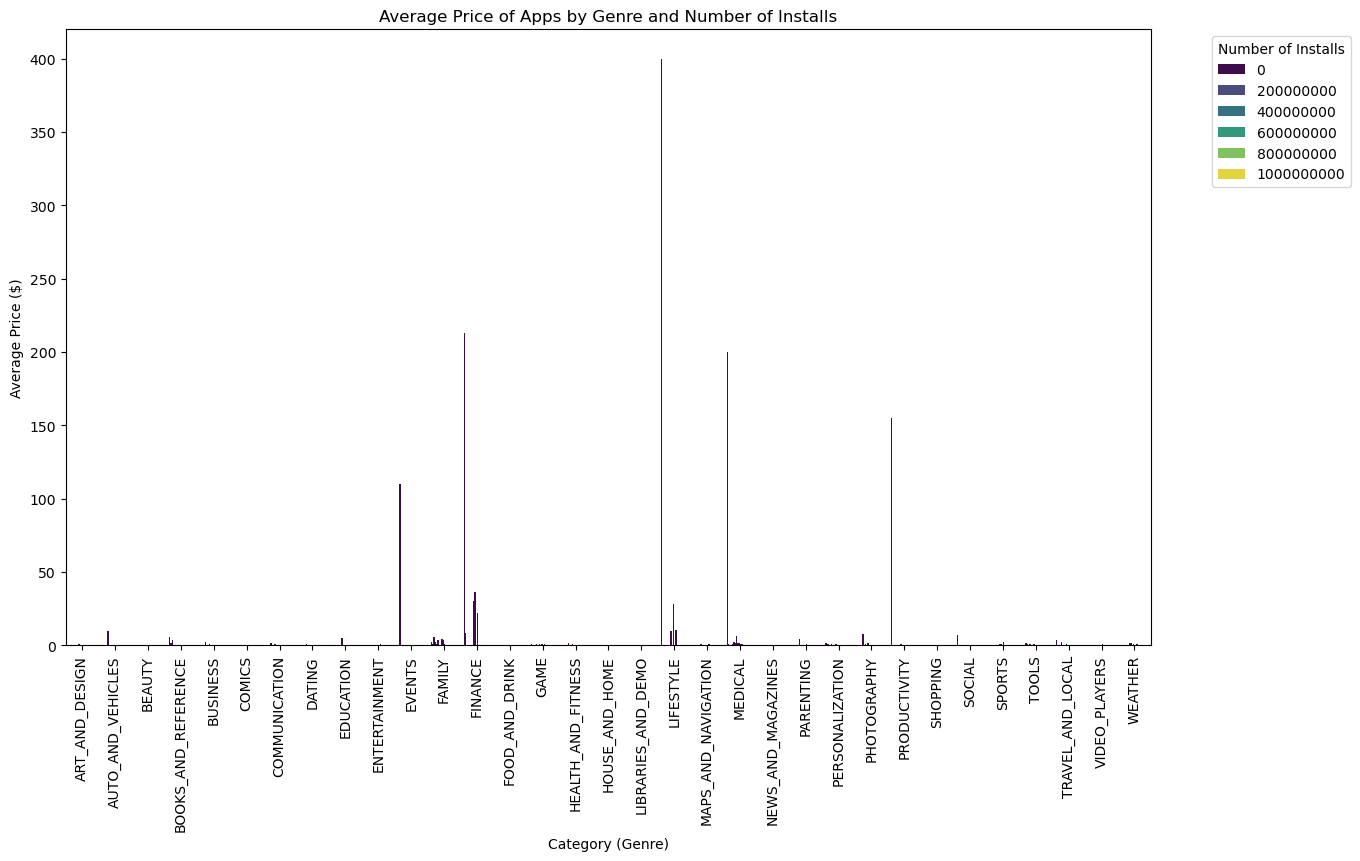

In [78]:

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price, x="Category", y="Price", hue="Installs", palette="viridis")

plt.xticks(rotation=90) 
plt.xlabel("Category (Genre)")
plt.ylabel("Average Price ($)")
plt.title("Average Price of Apps by Genre and Number of Installs")
plt.legend(title="Number of Installs", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

- ### How many apps have a rating higher than 4.7, and what is their average price?

In [79]:

high_rating_apps = df[df['Rating'] > 4.7]

num_apps = high_rating_apps.shape[0]
avg_price = high_rating_apps['Price'].mean()

print(f"Number of apps with rating > 4.7: {num_apps}")
print(f"Average price of these apps: ${avg_price:.2f}")


Number of apps with rating > 4.7: 624
Average price of these apps: $0.60


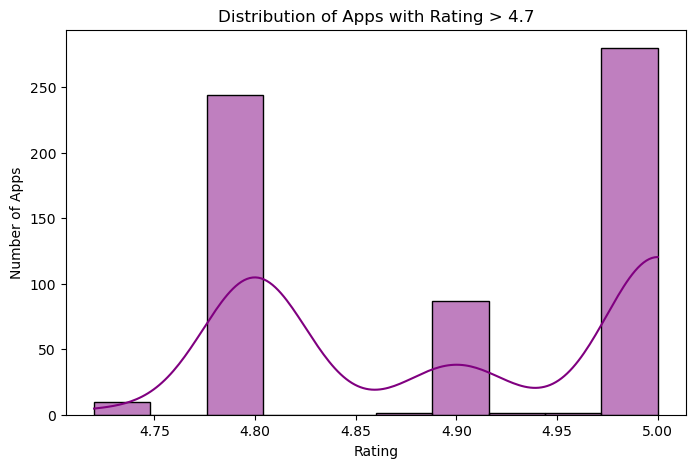

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(high_rating_apps["Rating"], bins=10, kde=True, color="purple")

plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.title("Distribution of Apps with Rating > 4.7")
plt.show()



- ### What is Google&#39;s estimated revenue from apps with 5,000,000+ installs?

- ### What is Google&#39;s estimated revenue from apps with 5,000,000+ installs?
Google’s Revenue=∑(Price×Installs×0.30)

In [81]:
high_install_apps = df[df["Installs"] >= 5_000_000]
high_install_apps["Revenue"] = high_install_apps["Price"] * high_install_apps["Installs"] * 0.30
total_revenue = high_install_apps["Revenue"].sum()
total_revenue

C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\50734961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_install_apps["Revenue"] = high_install_apps["Price"] * high_install_apps["Installs"] * 0.30


44910000.0

C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\3678383776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_apps["Revenue"], y=top_revenue_apps["App"], palette="viridis")


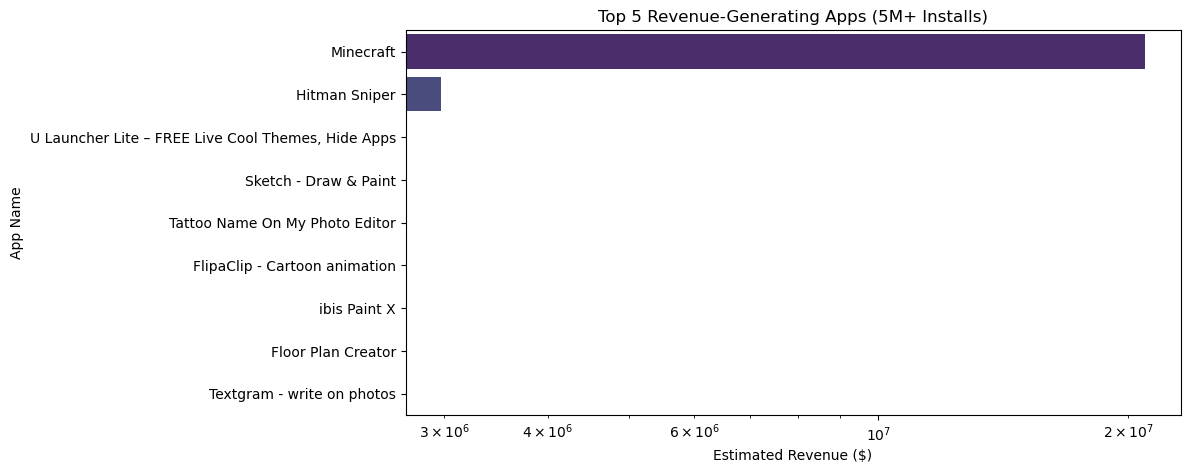

In [86]:
top_revenue_apps = high_install_apps.nlargest(10, "Revenue")
plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue_apps["Revenue"], y=top_revenue_apps["App"], palette="viridis")

plt.xlabel("Estimated Revenue ($)")
plt.ylabel("App Name")
plt.title("Top 5 Revenue-Generating Apps (5M+ Installs)")
plt.xscale("log")  
plt.show()


- ### What are the maximum and minimum sizes of free vs. paid apps?

In [87]:
max_size = df.groupby("Type")["Size"].max()
min_size = df.groupby("Type")["Size"].min()

print("The max size of the Free and Paid apps:")
print(max_size.to_string())

print("\nThe min size of the Free and Paid apps:")
print(min_size.to_string())



The max size of the Free and Paid apps:
Type
Free    100000000.0
Paid    100000000.0

The min size of the Free and Paid apps:
Type
Free    0.0
Paid    0.0


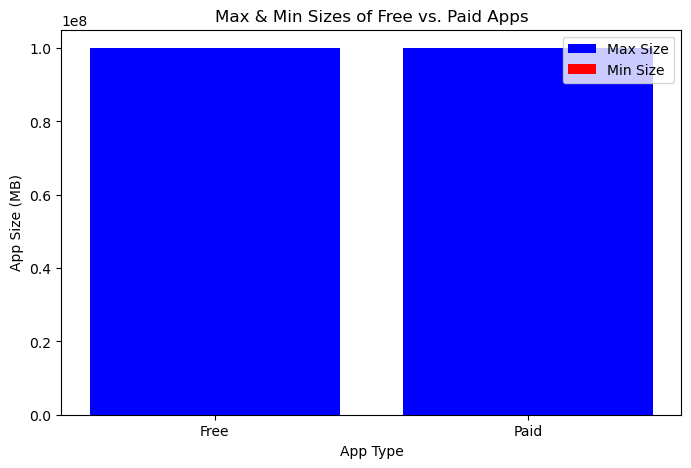

In [88]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(max_size.index, max_size.values, color='b', label="Max Size")
ax.bar(min_size.index, min_size.values, color='r', label="Min Size")

ax.set_ylabel("App Size (MB)")
ax.set_xlabel("App Type")
ax.set_title("Max & Min Sizes of Free vs. Paid Apps")
ax.legend()
plt.show()

- ### Is there a correlation between an app’s rating, number of reviews, size, and its price?

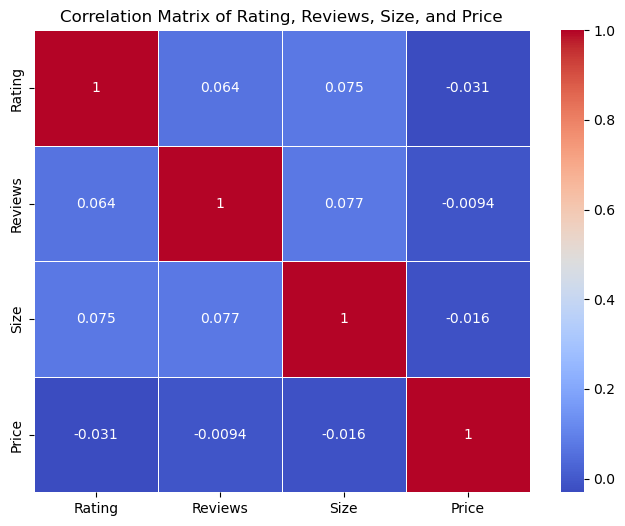

In [90]:
correlation_df = df[["Rating", "Reviews", "Size", "Price"]]

correlation_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix of Rating, Reviews, Size, and Price")
plt.show()


- ### How many apps exist for each type (free/paid) across different content ratings?

In [93]:
type_content_counts = df.groupby(["Content Rating", "Type"]).size().unstack()
print("Number of Free vs Paid Apps Across Content Ratings:\n")
print(type_content_counts)


Number of Free vs Paid Apps Across Content Ratings:

Type               Free   Paid
Content Rating                
Adults only 18+     3.0    NaN
Everyone         7720.0  662.0
Everyone 10+      344.0   32.0
Mature 17+        428.0   19.0
Teen             1094.0   52.0
Unrated             2.0    NaN


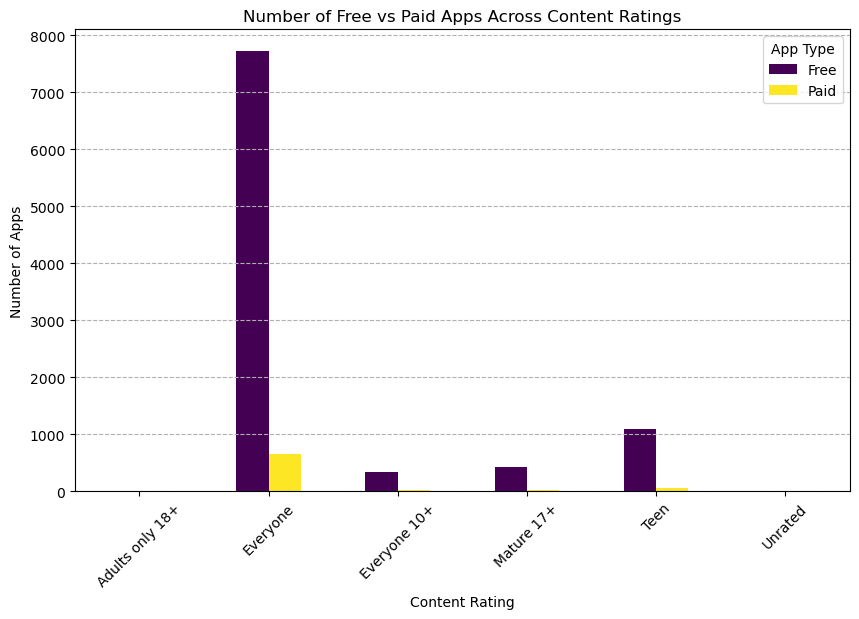

In [95]:

type_content_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")

plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.title("Number of Free vs Paid Apps Across Content Ratings")
plt.xticks(rotation=45)
plt.legend(title="App Type")
plt.grid(axis="y", linestyle="--")

plt.show()

- ### How many apps are compatible with Android version 4.x?

In [96]:
android_4x_apps = df[df["Android Ver"].str.startswith("4.")]
num_android_4x_apps = len(android_4x_apps)
num_android_4x_apps

6701

C:\Users\Amany\AppData\Local\Temp\ipykernel_4740\3634244150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=android_4x_counts.index, y=android_4x_counts.values, palette="viridis")


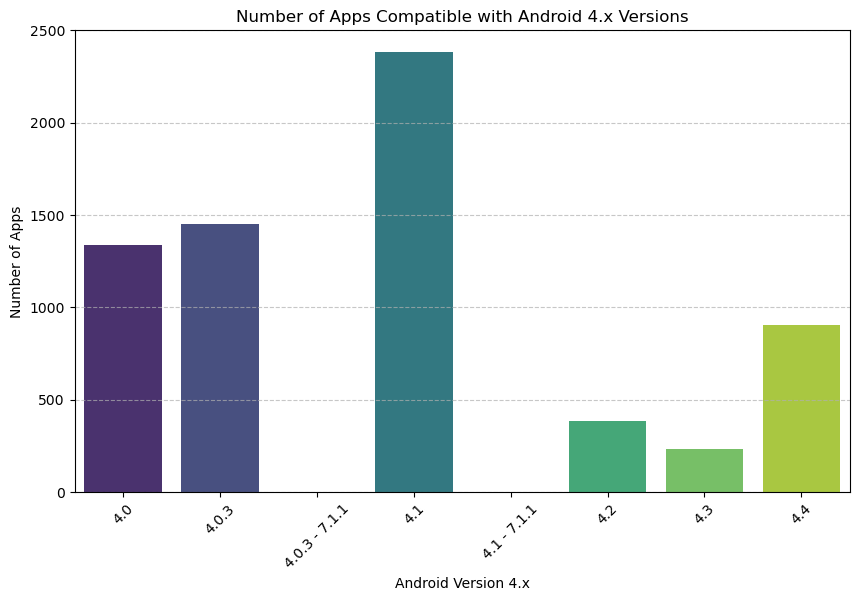

In [99]:
android_4x_counts = android_4x_apps["Android Ver"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=android_4x_counts.index, y=android_4x_counts.values, palette="viridis")
plt.xlabel("Android Version 4.x")
plt.ylabel("Number of Apps")
plt.title("Number of Apps Compatible with Android 4.x Versions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()